# Assignment 2 - Question 3
The objective of this assignment is to get you familiarize with  the  problem  of  `Dimensionality Reduction`.

## Instructions
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells.
- No inbuilt functions to be used until specified. Libraries allowed (Numpy, matplotlib)

## Datasets 
- The IIIT-CFW is database for the cartoon faces in the wild. The dataset contains 8928 annotated cartoon faces of famous personalities of the world with varying profession. Additional 1000 real faces of the public figure to study cross modal retrieval tasks, such as, Photo2Cartoon retrieval. Ref - https://cvit.iiit.ac.in/research/projects/cvit-projects/cartoonfaces
- We have sub sampled the following data for this assignment - Cartoon faces of 8 subjects and approx. 100 images for each subject. 

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_Assignment2_Q3.ipynb`.

In [2]:
# Installing Pillow Libraries
!pip install scikit-learn matplotlib Pillow

In [3]:
import numpy as np
import os
from random import randrange
from matplotlib import pyplot as plt
from PIL import Image
from numpy.linalg import eig
from sklearn.decomposition import PCA

## Load Data

In [4]:
cfw_dict = {
    'Amitabhbachan': 0,
    'AamirKhan': 1,
    'DwayneJohnson': 2,
    'AishwaryaRai': 3,
    'BarackObama': 4,
    'NarendraModi': 5,
    'ManmohanSingh': 6,
    'VladimirPutin': 7
}

opt = {
    'image_size': 32,
    'is_grayscale': False,
    'val_split': 0.75
}

In [5]:
def load_image(path):
    im = Image.open(path).convert('L' if opt['is_grayscale'] else 'RGB')
    im = im.resize((opt['image_size'],opt['image_size']))
    im = np.array(im)
    im = im/256
    return im

def display_images(imgs,classes,row=1,col=2,w=32,h=32):
    fig=plt.figure(figsize=(8, 8))
    for i in range(1, col*row +1):
        img = imgs[i-1]
        fig.add_subplot(row, col, i)
        
        if opt['is_grayscale']:
            plt.imshow(img , cmap='gray') 
        else:
            plt.imshow(img)
        
        plt.title("Class:{}".format(classes[i-1]))
        plt.axis('off')
    plt.show()

def load_data(dir_path):
    image_list = []
    y_list = []
    label_dict = cfw_dict
    for filename in sorted(os.listdir(dir_path)):
        if filename.endswith(".png"):
            im = load_image(os.path.join(dir_path,filename))
            y = filename.split('_')[0]
            y = label_dict[y] 
            image_list.append(im)
            y_list.append(y)
        else:
            continue
    image_list = np.array(image_list)
    y_list = np.array(y_list)
    print("Dataset shape:",image_list.shape)
    print("Label shape:",y_list.shape)

    return image_list,y_list

In [6]:
dirpath = './IIIT-CFW'
X,y = load_data(dirpath)

Dataset shape: (672, 32, 32, 3)
Label shape: (672,)


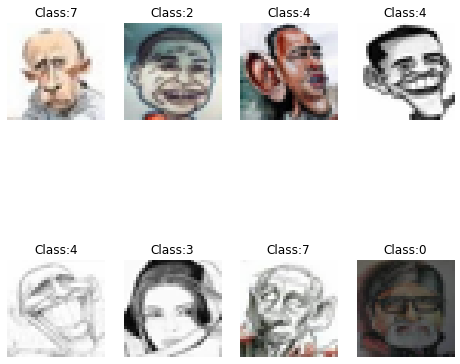

In [7]:
N,H,W = X.shape[0:3]
C = 1 if opt['is_grayscale'] else X.shape[3]

ind = np.random.randint(0,y.shape[0],8)
display_images(X[ind,...],y[ind], row=2,col=4)

## Dimensionality Reduction
- Plot eigen spectrum for the data.

Percentage of variance preserved is defined as the fraction of eigen values used. As we include more principal components to describe the data, the percentage of variances preserved under the dimensionality reduction increases. 

- Plot the percentage of variances vs the number of principal components to validate the above statement.
- Try visualizing these eigen vectors. Comment on what these ghost faces represent 
- Try reconstructing images with your choice of number of principal components and visualize the reconstructed image.

Let's define reconstruction error as the frobenius norm of the difference between original and reconstructed image. 

- Plot the number of principal components vs the corresponding reconstruction error for 5 selected number of principal components of your choice.
- Using the two dominant principal values, plot the data with colors showing the labels. What do you observe?


#### Write a function that gives eigen values and eigen vectors given data

In [8]:
# This function will give use matrix after flattening, eigen value and eigen vector of the input matrix
def geteig(X):
    X_new = []
    for i in X:
        X_new.append(i.flatten())
    X_new = np.array(X_new)
    X_new = X_new.T
    mat = np.cov(X_new)
    eig_val, eig_vec = eig(mat)
    
    return X_new, eig_val, eig_vec

In [9]:
# This function will give us number of components required for achieving 90% variance
def findComponents(eigen_value):
    k = 0
    cum = 0 
    total_sum = np.sum(eigen_value.real)
    for i in eigen_value.real:
        cum = cum + i
        k = k +1
        if (cum/total_sum)>0.9:
            break
    return k

#### Compute eigen values and plot eigen value spectrum

In [10]:
X_new, eig_val, eig_vec = geteig(X)

In [11]:
k = findComponents(eig_val)
print("Number of components required to achieve 90% variance in whole dataset :" , k)

Number of components required to achieve 90% variance in whole dataset : 115


In [12]:
# eigen values and spectrum
def plotEigenSpectrum(eig_val):
    l = [x for x in range(len(eig_val))]
    plt.plot(l,np.cumsum(eig_val),color="blue")
    plt.xlabel("No of Components")
    plt.ylabel("Cummalative eigen values")
    plt.show()

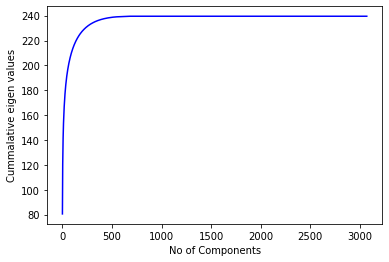

In [13]:
plotEigenSpectrum(eig_val.real)

#### Plot the percentage of variances vs the number of principal components

In [14]:
# plot variance vs components
def plotVarianceVsComponents(eig_val):
    total_sum = np.sum(eig_val)
    l = [x for x in range(len(eig_val))]
    plt.plot(l,(np.cumsum(eig_val)/total_sum)*100,color="blue")
    plt.xlabel("No of Components")
    plt.ylabel("Variance percentage")
    plt.show()

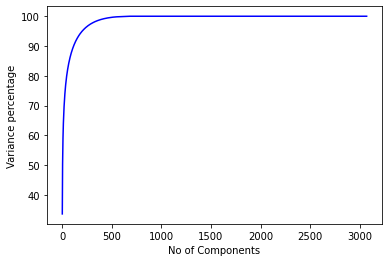

In [15]:
plotVarianceVsComponents(eig_val.real)

#### Visualize eigen faces(eigen vectors)

In [16]:
#This function is used to convert the rgb value to equivalent gray value
def rgb2gray(img):
    gray = np.dot(img[...,:3],[0.2989, 0.5870, 0.1140])
    return gray

In [17]:
def showEigenFaces(eig_vec, numberofImages):
    plt.figure(figsize=(32,32))
    for i in range(numberofImages):
        img = eig_vec[:,i].real.reshape(32,32,3)
        img = rgb2gray(img)
        if numberofImages%10==0:
            plt.subplot(numberofImages//10,10,i+1)
        else:
            plt.subplot((numberofImages//10)+1,10,i+1)
        plt.imshow(img, cmap=plt.cm.gray)
    plt.show()

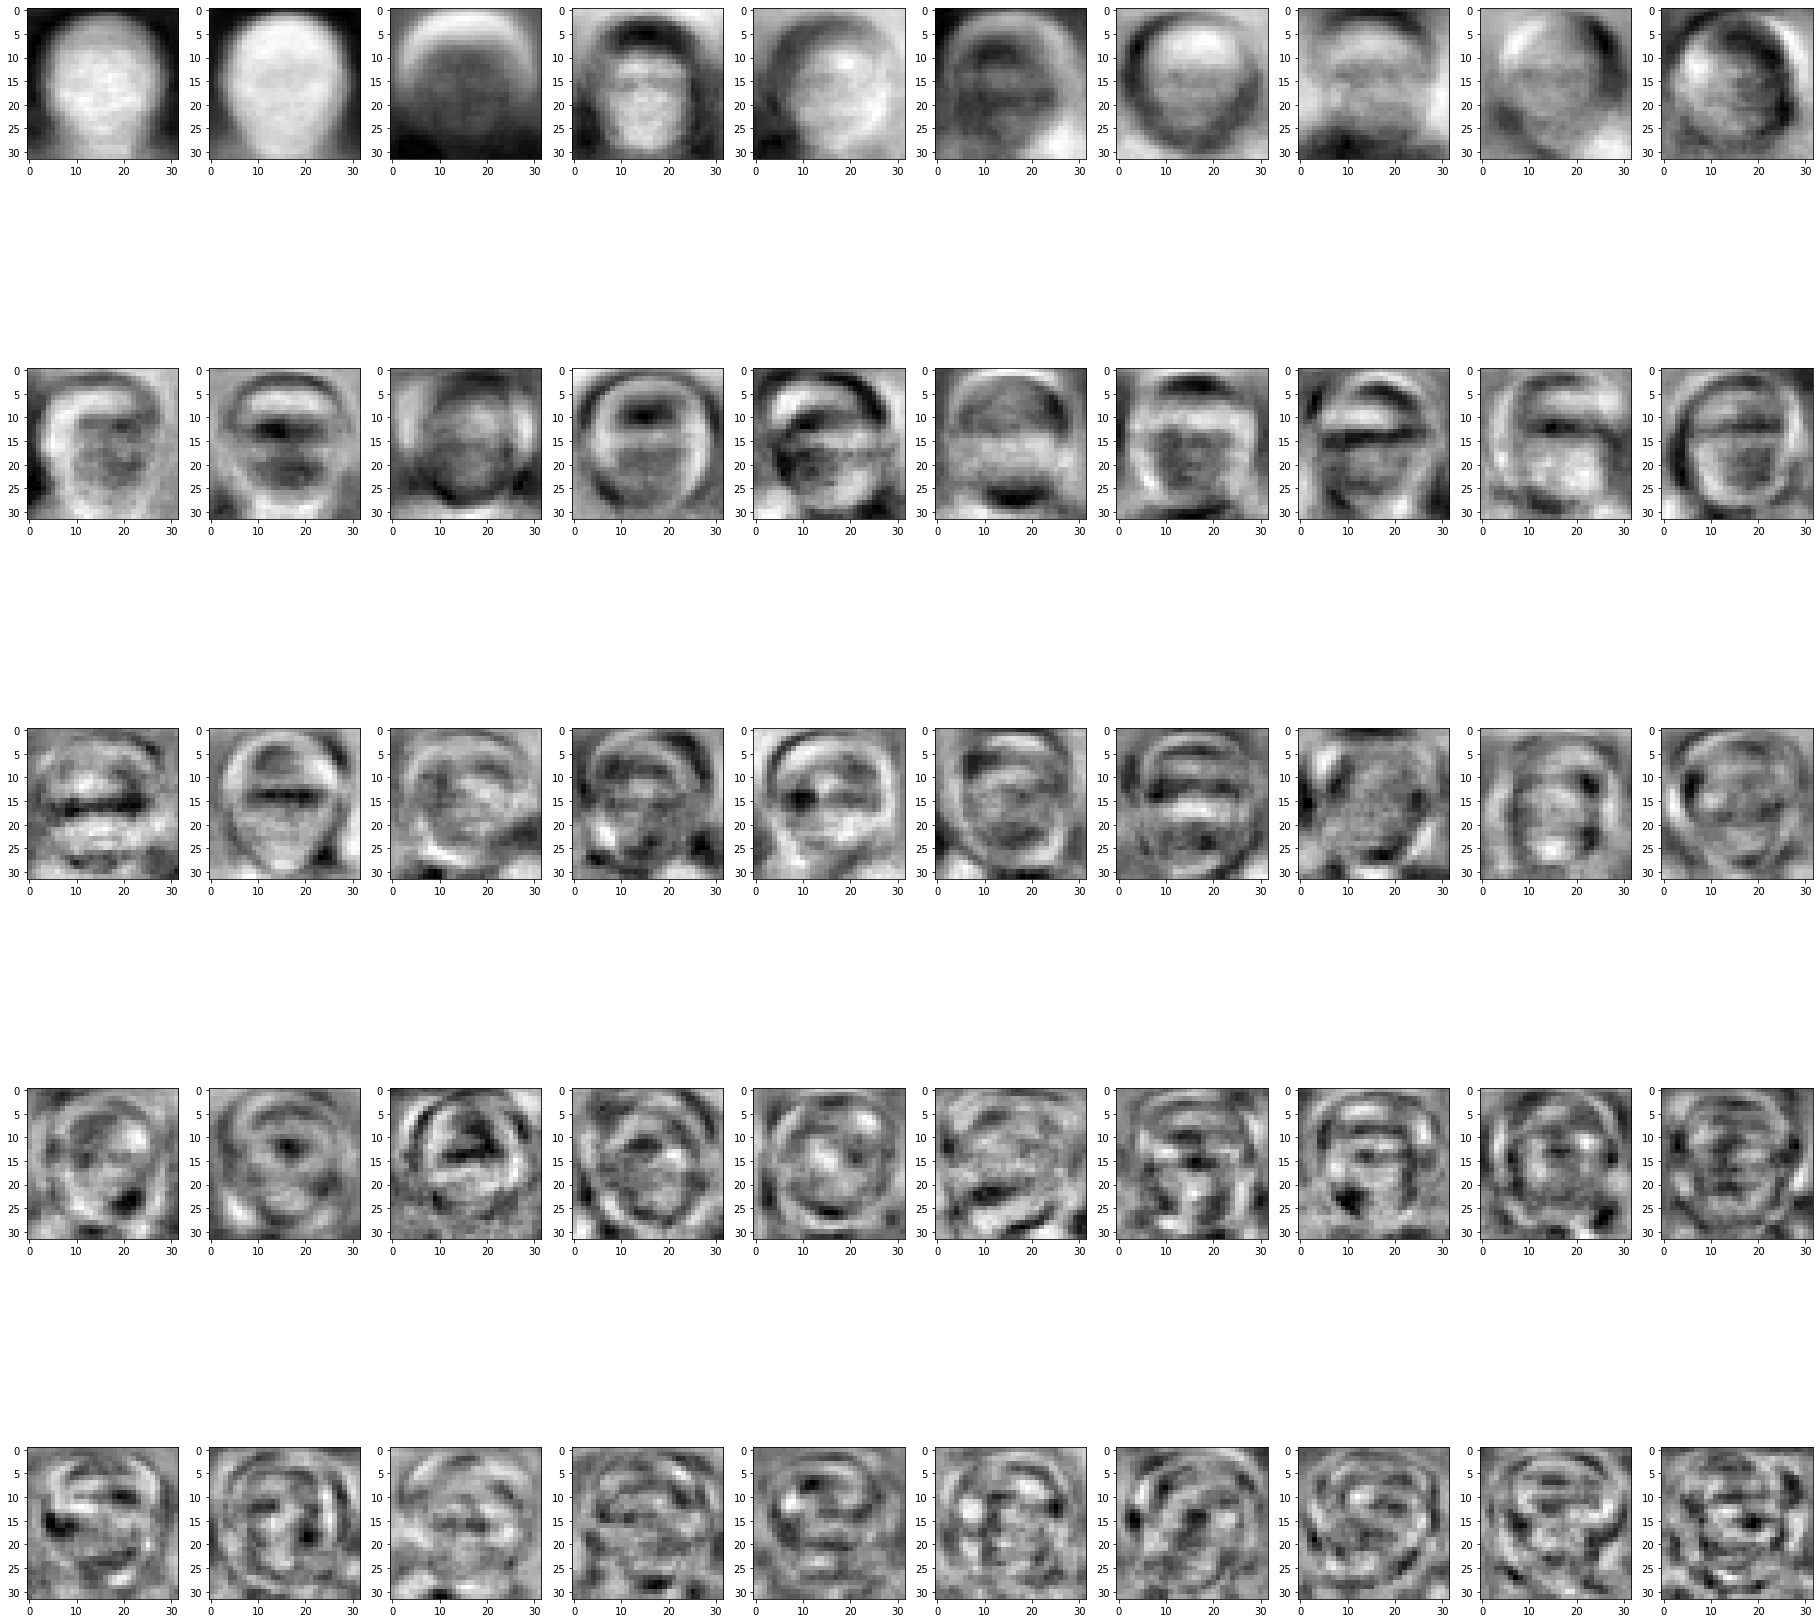

In [18]:
#showEigenFaces function will take 2 arguments eigen vector and number of image to display
# It will display images in form of grid each row contains 10 images 
showEigenFaces(eig_vec, 50)

#### Reconstruction 

In [19]:
# """
# Use the below sample code to visualize the eigen faces and reconstructed images (can write your own function as well)

def plot(image,H,W,C,indices):
    #indices = [randrange(100)+1 for i in range(5)]
    pl = np.reshape(image.T,(-1,H,W,C))
    plt.figure(figsize=(25,25))
    for c,i in enumerate(indices):
        ele = pl[i]
        minim = np.min(ele)
        maxim = np.max(ele)
        ele = (ele - minim) / (maxim - minim)
        ele = np.clip(ele,0,254)
        plt.subplot(12,12,c+1)
        plt.axis('off')
        plt.imshow(ele,cmap=plt.cm.gray)
    plt.show()

In [20]:
def reconstruction(eig_vec, X_new, components):
    eig_vec_sub = eig_vec[:,0:components]
    x_reduced = np.matmul(X_new.T,eig_vec_sub.real)
    img_rec = np.matmul(x_reduced, eig_vec_sub.T)
    indices = [randrange(12)+1 for i in range(5)]
    plot(img_rec.real.T,H,W,C, indices)
    return img_rec

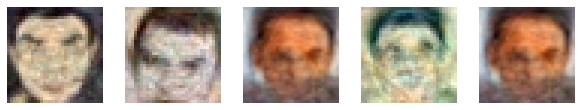

In [21]:
#reconstruction function takes 3 arguments as input
# arg1 - eig_vec of the feature matrix
# arg2 - Flattened matrix
# arg3 - Number of components here we have taken number of components required to achieve 90% variance
# this function will give you 5 random images plot after dimentionality reduction
img_rec = reconstruction(eig_vec, X_new, k)

#### Reconstruction error Vs Number of Components Plot

In [22]:
def errorf(a,b):
    a = np.array(a)
    b = np.array(b)
    return np.linalg.norm(a-b)

In [23]:
def func(comp, img):
    eig_vec_sub = eig_vec[:,0:comp]
    x_reduced = np.matmul(img.T,eig_vec_sub.real)
    img_rec = np.matmul(x_reduced, eig_vec_sub.T)
    return errorf(img, img_rec.T)

In [24]:
# plot data in 2D
# reconstruction error vs no. of components
# plotErrorVsComponents function takes 3 arguments
# arg1 - the flattened matrix
# arg2 - image_idx which image index of the image you want to calculate reconstruction error
# arg3 - number of components you want to use to reconstruct the image
def plotErrorVsComponents(X_new, image_idx, components):
    error = []
    for i in range(components):
        error.append(func(i,X_new.T[image_idx]))
    l = [x for x in range(components)]
    plt.plot(l, error, color='red')
    plt.show()

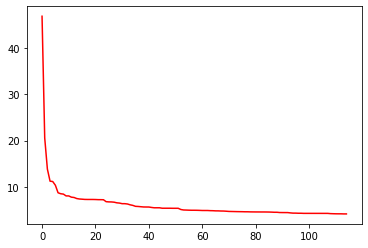

In [25]:
plotErrorVsComponents(X_new, 15, k)

We can observe from the above plot that as we increase the number of components the reconstruction error decreases and gives us more accurate image.

#### Plot data in 2D

In [26]:
pca1 = PCA(n_components=2)
pca1 = pca1.fit_transform(X_new)

In [27]:
pca2 = PCA(n_components=2)
pca2 = pca2.fit_transform(img_rec.T.real)

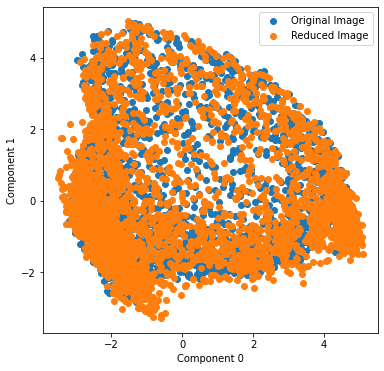

In [28]:
plt.figure(figsize =(6, 6))
plt.scatter(pca1[:,0], pca1[:,1], label="Original Image")
# plt.show()
plt.scatter(pca2[:,0], pca2[:,1], label="Reduced Image")
plt.xlabel("Component 0")
plt.ylabel("Component 1")
plt.legend()
plt.show()

## Lets analyze the principal components classwise
- Visualize dominant eigen faces of each of the classes.
- Print the number of principal components required to retain 90% variance for each of the classes and for the entire dataset
- Are the number of components same for entire dataset and each of the classes. If yes why? If not why?

Example output:
```
Number of principal components required for 90% reconstruction of the:
Entire Dataset = 10 
Amitabhbachan = 10
AamirKhan = 10
...
```

In [29]:
# Load data again
X,y = load_data(dirpath)

Dataset shape: (672, 32, 32, 3)
Label shape: (672,)


In [30]:
# Creating list to store the images for each class labels 
l = []
for i in range(8):
    l.append([])
for i,j in zip(X,y):
    l[j].append(i)

In [31]:
# Find flattened matrix , eigen values and eigen vectors for each class separately
data = {}
for i in range(8):
    X_new_class, eig_val_class, eig_vec_class = geteig(l[i])
    print(i)
    data[i] = [X_new_class, eig_val_class, eig_vec_class]

0
1
2
3
4
5
6
7


#### Visualize dominant eigen faces of each of the classes

Eigen Faces for Class :  0


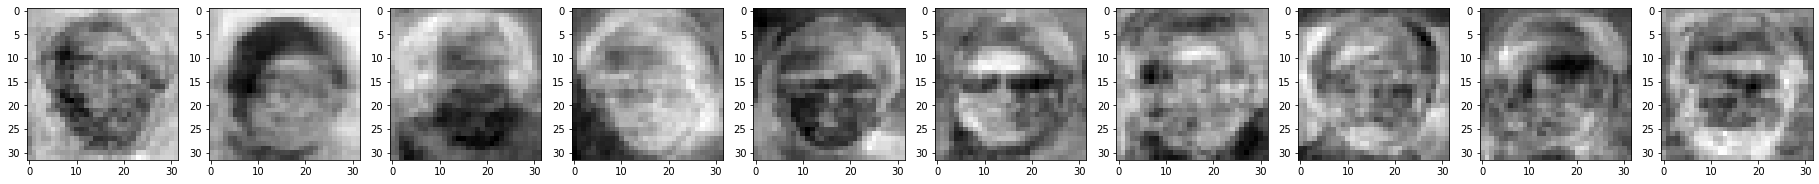

Eigen Faces for Class :  1


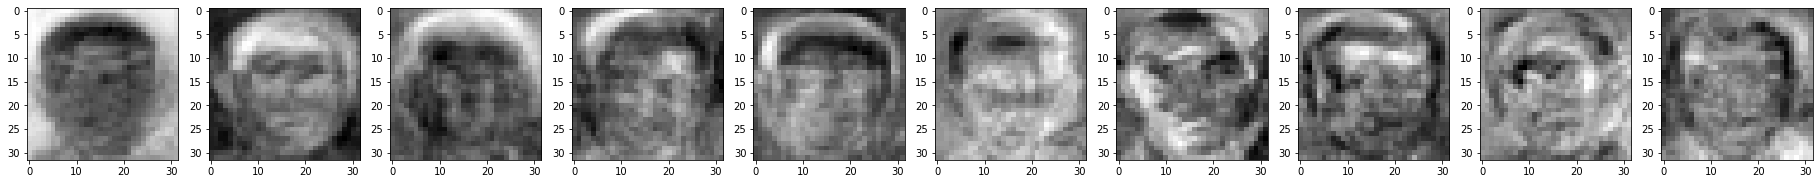

Eigen Faces for Class :  2


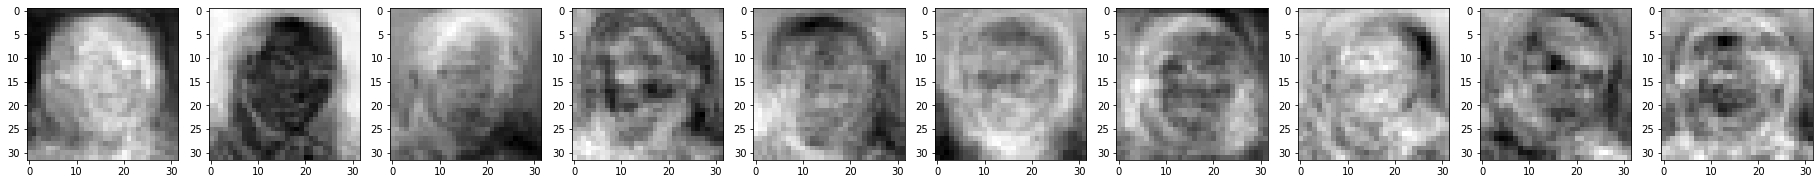

Eigen Faces for Class :  3


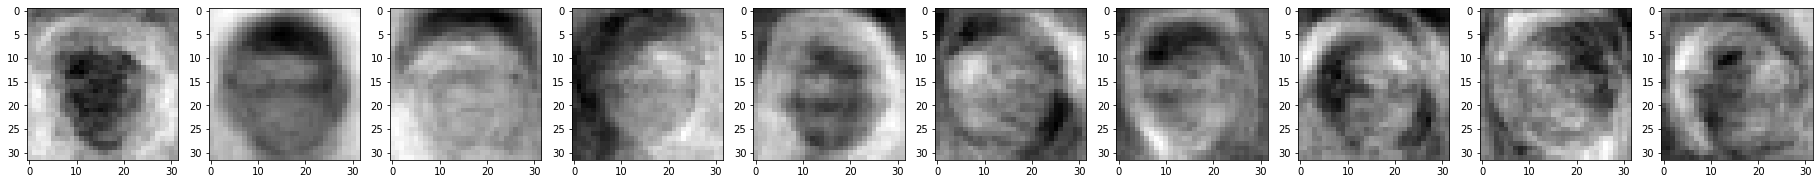

Eigen Faces for Class :  4


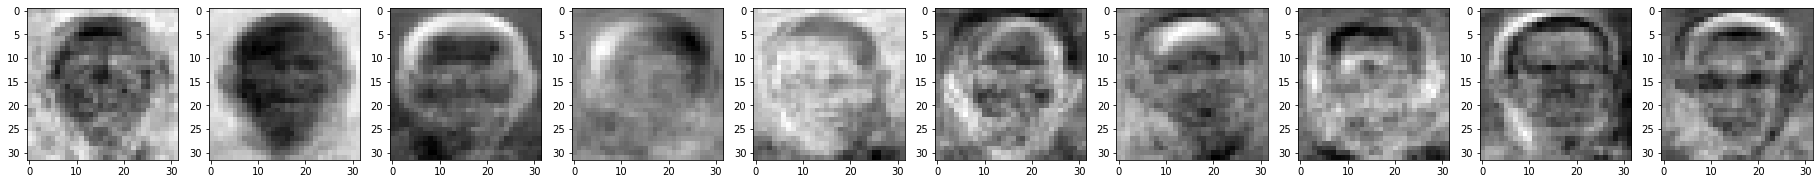

Eigen Faces for Class :  5


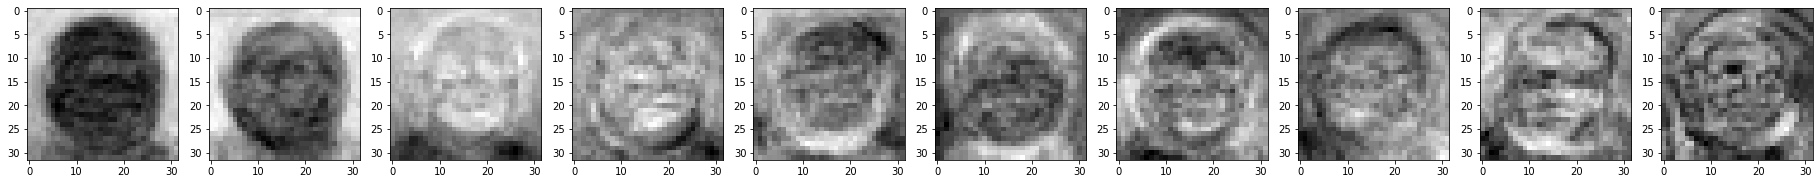

Eigen Faces for Class :  6


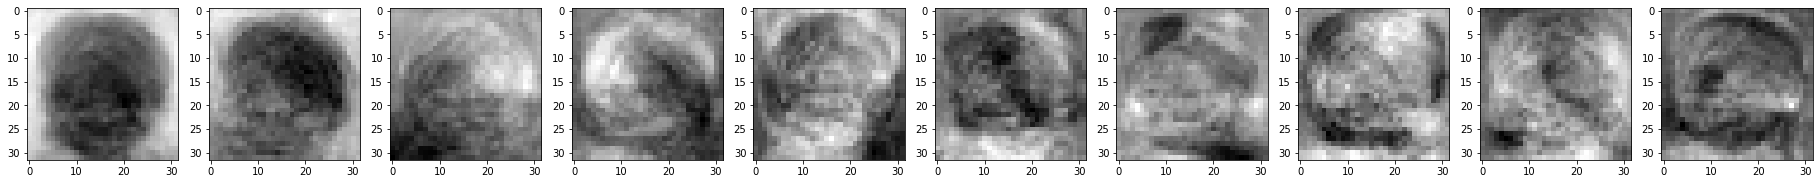

Eigen Faces for Class :  7


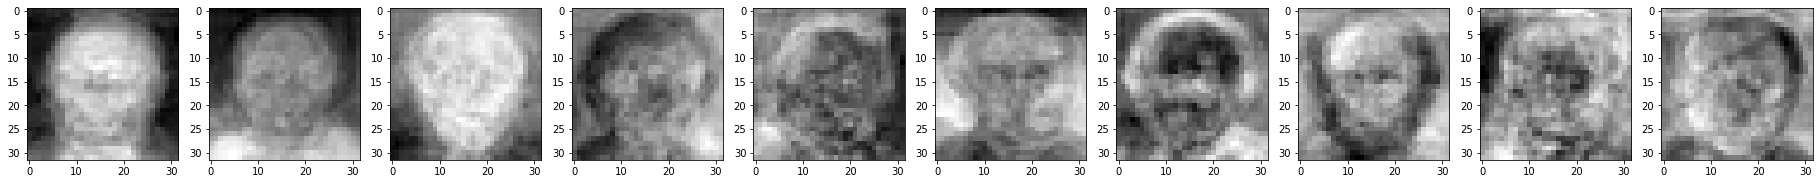

In [32]:
# visualizing top 10 eigen faces for each class
for i in range(8):
    print("Eigen Faces for Class : ", i)
    showEigenFaces(data[i][2], 10)

#### Number of principal components required to retain 90% variance for each of the classes and for the entire dataset

In [33]:
for i in range(8):
    print("Number of Components required to achieve variance greater then 90% for Class ",i,":",findComponents(data[i][1]))
    print()

print("Number of Components required to achieve variance greater then 90% for Entire Dataset :",findComponents(eig_val))


Number of Components required to achieve variance greater then 90% for Class  0 : 21

Number of Components required to achieve variance greater then 90% for Class  1 : 24

Number of Components required to achieve variance greater then 90% for Class  2 : 28

Number of Components required to achieve variance greater then 90% for Class  3 : 36

Number of Components required to achieve variance greater then 90% for Class  4 : 43

Number of Components required to achieve variance greater then 90% for Class  5 : 57

Number of Components required to achieve variance greater then 90% for Class  6 : 50

Number of Components required to achieve variance greater then 90% for Class  7 : 44

Number of Components required to achieve variance greater then 90% for Entire Dataset : 115


#### Analysis : Are the number of components same for entire dataset and each of the classes. If yes why? If not why?

We can see that to achieve 90% variance the components required for each class is significantly less than the number of components required for whole dataset. This happens because for a particular class we have images of same person so most of the features were common in them and the differentiating features were less hence they have higher impact on variance. But for the whole dataset we have images of 8 different personalities which means we will lot of different features and those features contributes significantly to the variance. Hence, the number of components to achieve 90% variance are less for indivisual class but high for whole dataset.

## Linear Regression (continued)
1. Perform linear regression on below datapoints
2. Use PCA for dimensionality reduction on this datapoints and then perform Linear regression.
3. Perform this experiment on different number of components and report the score for linear regression. Plot the graph of [1-200] principal components vs regression score. What do you observe?

Note :- Can use inbuilt functions for Linear Regression and PCA for this question

In [34]:
# datapoints
X,_ = load_data(dirpath)
X = X.reshape((X.shape[0],-1))
label = np.array([randrange((32*32*3)) for i in range(5)])
label = np.mean(X[:,label], axis = 1)
print(label.shape)

Dataset shape: (672, 32, 32, 3)
Label shape: (672,)
(672,)


In [35]:
# code here
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

In [36]:
# code here
score = []
for i in range(1,201):
    pca = PCA(n_components = i)
    pca = pca.fit_transform(X)
    model = LinearRegression()
    model = model.fit(pca,label)
    score.append(model.score(pca,label))

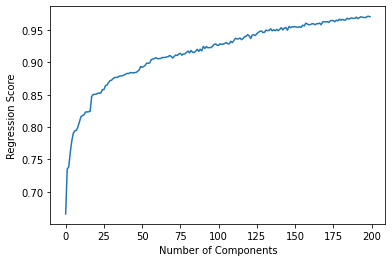

In [37]:
# Analysis / plot (split the cells if required)
plt.plot(score)
plt.xlabel('Number of Components')
plt.ylabel('Regression Score')
plt.show()


From above plot we can infer that as we increase the number of components the regression score increases. The perfect value for regression score is 1 and with 200 components we have almost achieved value 0.98. So, we can say that if we want 98% accurancy that we can discard other 2872 components and take only 200 components from 3072 components. Also, we can conclude that most of the features contribute very less in the image creations and some of the features contributes heavily. So when the computation cost is very high we can reduce features and yet get significantly good results.cDimensionality Reduction is successfully implemented.
